In [1]:
import torch
import  numpy as np

In [2]:
# numpy cover 

arr = np.array([1, 2, 3, 4, 5, 6, 7])
arr[1:5: 2]

array([2, 4])

In [3]:
x  = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [4]:
# can do -1 if want to infer either x or y
x  = x.reshape(-1, 4 )

torch.ones(5,2 )
torch.zeros(3,4,4)
torch.randn(3)

torch.tensor([1,2,3])
x[-1], x[1:3]
x[:2, :] # first 2 rows and all columns
torch.exp(x) # e^x


tensor([[1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01],
        [5.4598e+01, 1.4841e+02, 4.0343e+02, 1.0966e+03],
        [2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04]])

In [5]:
x = torch.tensor([1,2,3, 4]).reshape(2,2)
y = torch.tensor([5,6,7, 5]).reshape(2,2)
x + y, x * y, x / y
print(x == y)
torch.cat((x, y), dim=0), torch.cat((x, y), dim=1)
x.sum()

tensor([[False, False],
        [False, False]])


tensor(10)

In [6]:
# broadcasting - even if not same shape, creates larger one then adds
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
a +  b # 3 x 2 axis

# save memory 
z = torch.zeros_like(y)
print(id(z))
z[:] = x + y # use slice to do in place
print(id(z))

# convert to other types 
a = x.numpy()
b = torch.from_numpy(a)
type(a), type (b)

136829526954288
136829526954288


(numpy.ndarray, torch.Tensor)

In [7]:
import os 
os.makedirs(os.path.join("./", "data"), exist_ok=True)
data_file = os.path.join("./", "data", "house_tiny.csv")
with open(data_file, "w") as f:
        f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [8]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [9]:
# dealing with nan values
inputs, targets = data.iloc[:, 0:2], data["Price"]
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs = inputs.fillna(inputs.mean()) 
inputs

,NumRooms,RoofType_Slate,RoofType_nan
0,3.0,False,True
1,2.0,False,True
2,4.0,True,False
3,3.0,False,True


In [10]:
x,y = torch.tensor(inputs.to_numpy(dtype=float)), torch.tensor(targets.to_numpy(dtype=float))
x,y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

In [11]:
import math
torch.arange(12).reshape(4, 3).T # transpose. if A^T = A then its symetric
# tensor is a nth order array!
torch.arange(8).reshape(2,4).sum(axis=1) # 0 is rows, 1 is cols

torch.ones(3).dot(torch.ones(3))

torch.arange(3)@torch.arange(6).reshape(3, 2) 

# norm tells us how big it is. 
a = torch.tensor([3.0, -4.0]) # note the floats .0
math.sqrt(sum(a**2)) # e l2 norm culadian norm
torch.norm(a) # l2 norm same as above but built in
torch.abs(a).sum() # l1 norm 
# l1 and l2 are special cases of lp norm
# Frobenius norm easy to compute - square root of the sum of the squares of a matrix’s elements
torch.norm(torch.ones((4, 9)))

tensor(6.)

Calculus. 
- integration + differentiation for optimization problem 
- goal is to perform well on unseen data!! called generlaization problem 
- need partial derivates as many params /dimensions. apply to multivariate functions
- delF is a vector of partial derivates. this is now the gradient!!

In [12]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [13]:
#@save
def use_svg_display():  
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')
#@save
def set_figsize(figsize=(3.5, 2.5)): 
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

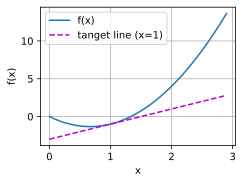

In [14]:
def f(x):
    return 3 * x ** 2 - 4 * x
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], "x", "f(x)", legend=["f(x)", "tanget line (x=1)"])

Automatic differentiation. 
- as we pass through function, the framework buold computational graph that tracks the operations and the gradients.
- to calculate the derivates, auto-diff works backwards through the graph applying the chain rule
- if y is vector with respect to x, then dy/dx is a jacobian matrix. contains partial derivates of y with respect to x.
- higher order derivates means higher order tensor.
- Most times we want to sum up all partial derviates to get gradient and match the shape of the input(x).

In [15]:
x = torch.arange(4.0, requires_grad=True) # avoid allocating memory on each derivate
x.grad # None by default 
y = 2 * torch.dot(x,  x) # y = 2* x^2 (grad will be 4x and will see results)
y.backward()
x.grad == 4 * x
# pytorch doesnt auto reset grad buffer when we record new grad. comes handy when optimize multiple objective functions 
x.grad.zero_() # reset grad
y = x.sum() # all scalar values thus just 1 in vector. with scalar would be 0
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [16]:
x.grad.zero_()
y = x * x # vector y
y.backward(gradient=torch.ones(len(y))) # faster y.sum().backward()
x.grad

# detach from computational graph if we want intermediate step 
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u # true !! does not equal x ** 3 as expected

x.grad.zero_()
y.sum().backward()
x.grad == 2 * x # true as y = x ** 2 ... 

tensor([True, True, True, True])

In [17]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a.grad == d / a # true

tensor(True)

stats and probabilities 
- multinomial for sampling 
- law of large numbers and central limit theorem tessts errors go down at rate of 1/sqrt(n) where n is the number of samples.
- 

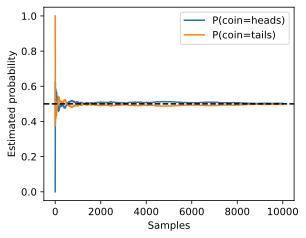

In [18]:
from torch.distributions.multinomial import Multinomial
fair_probs = torch.tensor([.5, .5 ])
Multinomial(1000, fair_probs).sample()  # 1000 tosses with probabilites 0.5,0.5
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [19]:
dir(torch.distributions)
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, us